#### 종가(Close) 5일 단위로 학습하고 4일치 애플주식의 종가(close)데이터가 입력되면 그다음 애플 주식의 종가를 예측하는 프로그램 작성

#### 데이터 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
import pandas as pd

apple = pd.read_csv("apple_stock.csv")
apple_df=pd.DataFrame(apple)
new_apple=apple_df['Close']
new_apple

In [ ]:
apple_np=new_apple.to_numpy()
apple_np

In [ ]:
T=np.fliplr(toeplitz(np.r_[apple_np[-1],np.zeros(apple_np.shape[0]-2)],apple_np[::-1]))
T

In [ ]:
X_train=T[:-1,:4][:,:,np.newaxis]
Y_train=T[:-1,4]
print("X_train.shape, Y_train.shape  = ", X_train.shape, Y_train.shape )
print("X_train[0], Y_train[0]  = ", X_train[0], Y_train[0])

#### 총정리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
import pandas as pd

def make_data():


    apple = pd.read_csv("apple_stock.csv")
    apple_df=pd.DataFrame(apple)
    new_apple=apple_df['Close']
    apple_np=new_apple.to_numpy()
    Data=np.fliplr(toeplitz(np.r_[apple_np[-1],np.zeros(apple_np.shape[0]-2)],apple_np[::-1]))

    X_train=Data[:-1,:4][:,:,np.newaxis]
    Y_train=Data[:-1,4]
    print("X_train.shape, Y_train.shape  = ", X_train.shape, Y_train.shape )
    print("X_train[0], Y_train[0]  = ", X_train[0], Y_train[0])

    return(X_train,Y_train)

if __name__=='__main__':
    make_data()

X_train.shape, Y_train.shape  =  (2263, 4, 1) (2263,)
X_train[0], Y_train[0]  =  [[30.10428619]
 [30.5728569 ]
 [30.62571335]
 [30.13857079]] 30.082857131958008


#### model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

def make_model():
    model=Sequential()
    model.add(SimpleRNN(10,input_shape=(4,1)))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='sgd')
    model.summary()
    return model

#### 예측하기

In [4]:
import numpy as np
import matplotlib.pyplot as plt

(X_train,Y_train) = make_data()    

model= make_model()

X_train.shape, Y_train.shape  =  (2263, 4, 1) (2263,)
X_train[0], Y_train[0]  =  [[30.10428619]
 [30.5728569 ]
 [30.62571335]
 [30.13857079]] 30.082857131958008
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


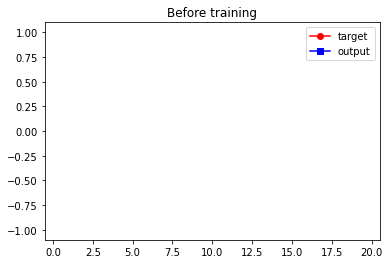

In [5]:
# 학습 전 에측 결과 (예측이 잘 맞지않음을 알 수 있다.)

plt.plot(Y_train, 'ro-', label="target") # 원래 값
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output") #학습전예측
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [6]:
# 학습
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

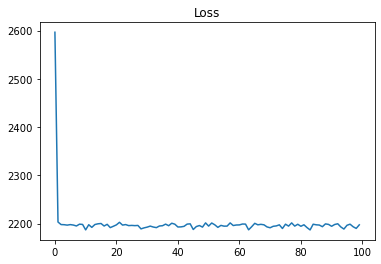

In [7]:
# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

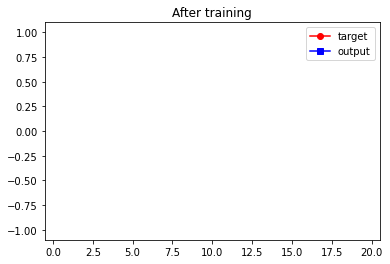

In [8]:
# 학습 후 예측 결과
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [10]:
y_predict = model.predict(X_train[:,:,:])
print(y_predict)

[[1.0470307e+02]
 [1.0470307e+02]
 [1.0470307e+02]
 ...
 [1.0470307e+02]
 [1.0470307e+02]
 [6.8652153e-02]]
